In [1]:
import numpy as np
import pandas as pd
import bokeh
from bokeh.models import ColumnDataSource
import pyproj
from pyproj import Transformer

In [2]:
#Loading twitter data into the python environment

twitter_data = pd.read_csv("complete_swiss_dataset.csv",encoding = "ISO-8859-15")

C:\Users\Laptop\Anaconda3\envs\Master Project\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (19,22,25,38,39,44,54,57,63,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,101) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
twitter_data.head()

Unnamed: 0 user_screen_name  \
0           1     ________char   
1           2  ______aki______   
2           3  ______pistolero   
3           4   _____FLOW_____   
4           5   _____helen____   

                                                  PK                  id  \
0  938162910789906432_207206008_47.5623099_7.5929...  938162910789906432   
1  916556894617194496_107519313_47.4506607_8.5832...  916556894617194496   
2  846853451816583168_1655581028_46.2015699_6.155...  846853451816583168   
3  614746843797397504_17493553_47.55831243_7.5876...  614746843797397504   
4  552088809727619072_838437504_46.85314442_9.512...  552088809727619072   

   latitude  longitude                                            raw_geo  \
0  47.56231    7.59298  {u'type': u'Point', u'coordinates': [7.59298, ...   
1  47.45066    8.58321  {u'type': u'Point', u'coordinates': [8.58321, ...   
2  46.20157    6.15554  {u'type': u'Point', u'coordinates': [6.15554, ...   
3  47.55831    7.58769  {u'type': u'Point', u'coordinates': [7.5876903...   
4  46.85314    9.51271  {u'type': u'Point', u'coordinates': [9.5127096...   

  place_type      place_full_name place_country_code  ...  \
0       city   Basel, Switzerland                 CH  ...   
1       city      Kloten, Schweiz                 CH  ...   
2       city  Geneva, Switzerland                 CH  ...   
3       city   Basel, Switzerland                 CH  ...   
4       city    Chur, Switzerland                 CH  ...   

        created_at_CET       created_at_GMT       created_at_EST  \
0  2017-12-05 22:47:22  2017-12-05 21:47:22  2017-12-05 16:47:22   
1  2017-10-07 08:52:47  2017-10-07 06:52:47  2017-10-07 01:52:47   
2  2017-03-29 00:36:11  2017-03-28 22:36:11  2017-03-28 17:36:11   
3  2015-06-27 12:47:23  2015-06-27 10:47:23  2015-06-27 05:47:23   
4  2015-01-05 14:06:44  2015-01-05 13:06:44  2015-01-05 08:06:44   

   check_in_bot  weather_station_bot  Stress.overall.score  homeplace  \
0         False                False                     0          0   
1         False                False                     0          0   
2         False                False                     0          0   
3          True                False                     0          0   
4         False                False                     0          0   

   workplace  cap_english cap_universal  
0          0     0.001554      0.002431  
1          0     0.002857      0.004725  
2          0     0.001725      0.002014  
3          0     0.085904      0.104603  
4          0     0.125146      0.075193  

[5 rows x 106 columns]

In [4]:
for i in range(0,len(twitter_data.columns)):
    print(twitter_data.columns[i])

Unnamed: 0
user_screen_name
PK
id
latitude
longitude
raw_geo
place_type
place_full_name
place_country_code
created_at
text
source
retweet_count
favorite_count
is_retweet
is_favorite
is_quote
is_reply
quoted_status_id_permalink
in_reply_to_status_id
in_reply_to_user_id
in_reply_to_screen_name
time_zone
time_zone_utc_offset
user_location
lang
user_id
user_name
user_account_geo_enabled
n_user_mentions
n_hashtags
n_symbols
n_media
n_urls
user_mentions
hashtags
symbols
media
media_types
urls
place_bounding_box_type
place_bounding_box_coords
raw_geo_obj_jic
user_profile_description
user_profile_description_length
user_is_verified
user_total_number_of_tweets_ever
user_followers_count
user_following_count
user_favourited_other_tweets_count
default_profile
user_custom_profile_image
profile_image_url_https
profile_banner_url
profile_background_image_url_https
user_custom_profile_bg_colour
user_custom_profile_bg_colour_hex
user_custom_profile_sidebar_fill_colour
user_custom_profile_sidebar_fill_c

In [5]:
time_data = twitter_data[['created_at_CET','Overall.score']].sort_values(by='created_at_CET',ignore_index=True)

In [6]:
time_data.head()

created_at_CET  Overall.score
0  2015-01-01 01:00:03              0
1  2015-01-01 01:00:09              0
2  2015-01-01 01:00:14              3
3  2015-01-01 01:00:22              0
4  2015-01-01 01:00:34              0

In [7]:
twitter_data['created_at_CET'][921301]

'2015-01-01 01:00:14'

In [8]:
twitter_data[['latitude','longitude']].head()

latitude  longitude
0  47.56231    7.59298
1  47.45066    8.58321
2  46.20157    6.15554
3  47.55831    7.58769
4  46.85314    9.51271

In [31]:
coord_data = twitter_data[['latitude','longitude']]
coord_data = coord_data.round(3)

In [10]:
coord_data.head()

latitude  longitude
0    47.562      7.593
1    47.451      8.583
2    46.202      6.156
3    47.558      7.588
4    46.853      9.513

In [23]:
from bokeh.plotting import figure, output_file, show
from bokeh.tile_providers import CARTODBPOSITRON, get_provider

output_file("tile.html")

tile_provider = get_provider(CARTODBPOSITRON)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(650000, 1200000), y_range=(5700000, 6100000),
           x_axis_type="mercator", y_axis_type="mercator", plot_width=1000)
p.add_tile(tile_provider)

transformer = Transformer.from_crs("epsg:4326", "EPSG:3857")

merc_coord = transformer.transform(coord_data['latitude'].values,
                            coord_data['longitude'].values)

source = ColumnDataSource(data=dict(longitude=merc_coord[0], latitude=merc_coord[1]))

p.circle(x='longitude', y='latitude', size=1, color="black", alpha=0.7, source=source)

#show(p)

GlyphRenderer(id='1721', ...)

In [12]:
from bokeh.plotting import figure, output_file, show
from bokeh.tile_providers import CARTODBPOSITRON, get_provider

output_file("tile.html")

tile_provider = get_provider(CARTODBPOSITRON)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(650000, 1200000), y_range=(5700000, 6100000),
           x_axis_type="mercator", y_axis_type="mercator",
           plot_width=1000)
p.add_tile(tile_provider)

transformer = Transformer.from_crs("epsg:4326", "EPSG:3857")

coord_data_no_dup = coord_data.drop_duplicates()

merc_coord_no_dup = transformer.transform(coord_data_no_dup['latitude'].values,
                                   coord_data_no_dup['longitude'].values)

source = ColumnDataSource(data=dict(longitude=merc_coord_no_dup[0], latitude=merc_coord_no_dup[1]))

p.circle(x='longitude', y='latitude', size=1, color="black", alpha=0.7, source=source)

show(p)

In [13]:
CH = ((6,  11), (45.5, 48))

from datashader.utils import lnglat_to_meters as webm
x_range,y_range = [list(r) for r in webm(*CH)]

plot_width  = int(3096)
plot_height = int(plot_width*7.0/12)

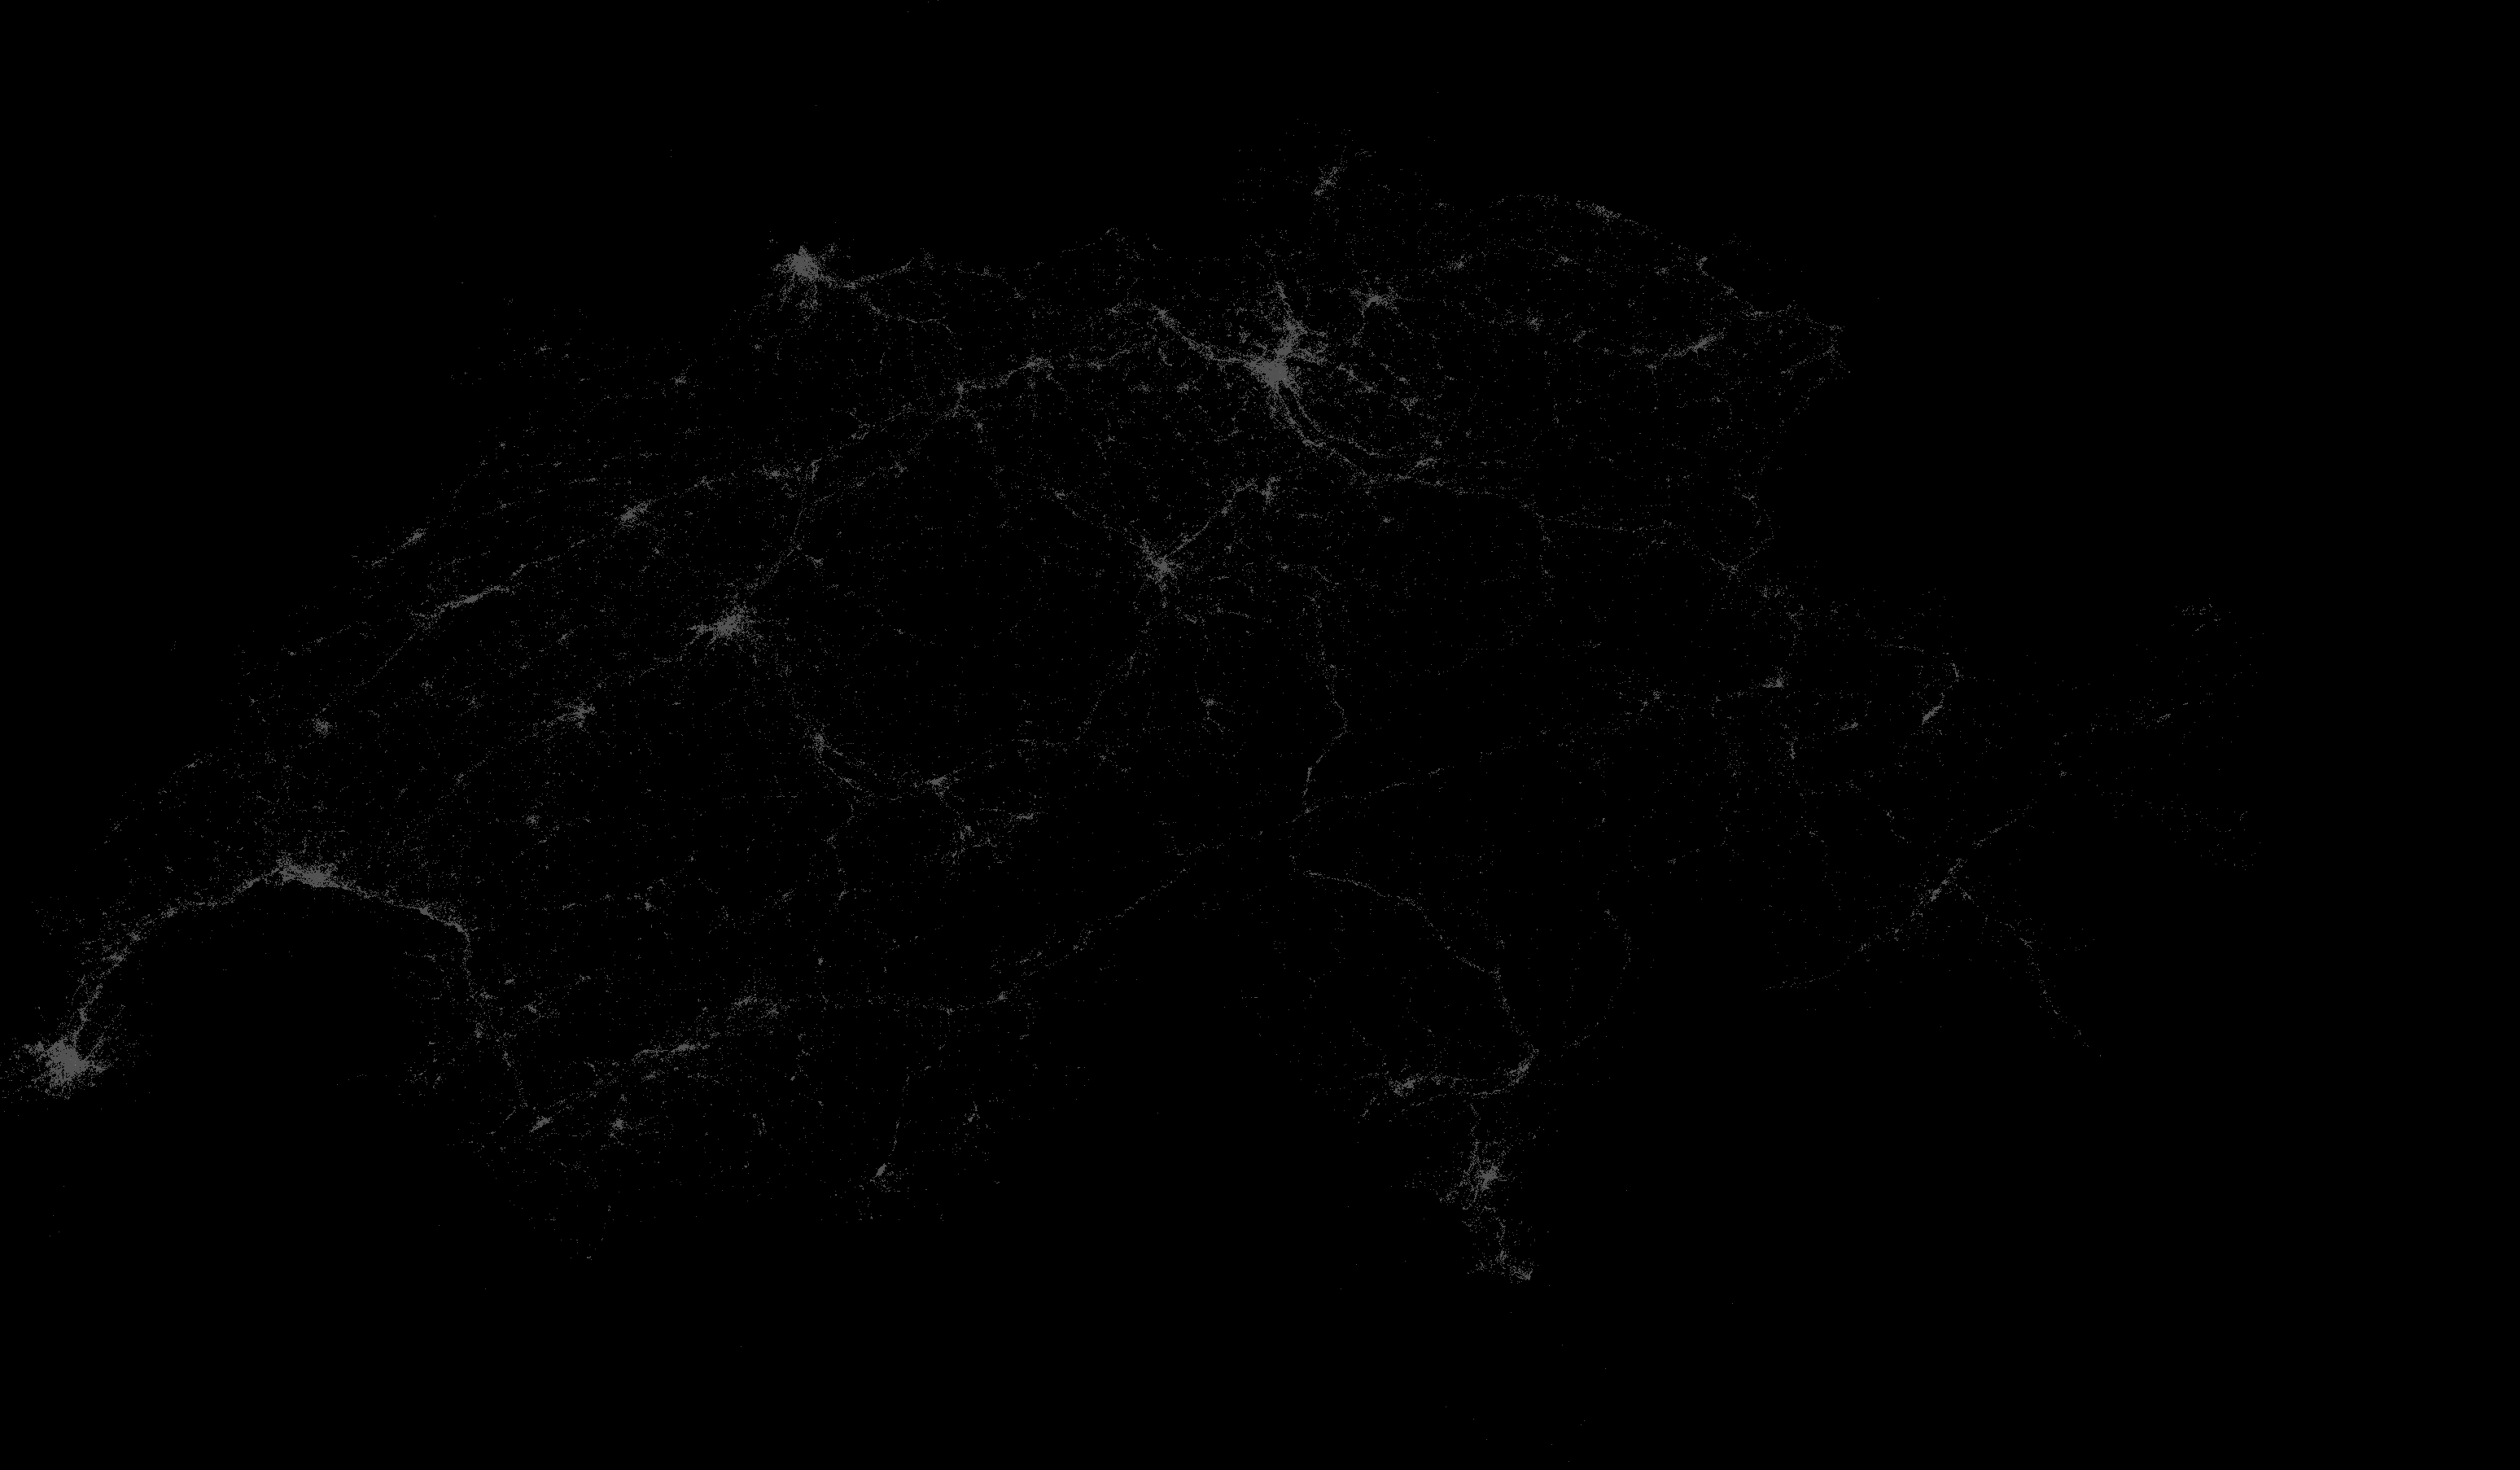

In [24]:
import datashader as ds, datashader.transfer_functions as tf, numpy as np
from datashader import spatial

background = "black"

from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9
from IPython.core.display import HTML, display

export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

cvs = ds.Canvas(plot_width, plot_height, *webm(*CH))

#Formatting merc_coord for datashader
merc_coord_ds = pd.DataFrame(np.array(merc_coord).T)
merc_coord_ds.columns = ['latitude','longitude']


agg = cvs.points(merc_coord_ds, 'latitude', 'longitude')
export(tf.shade(agg, cmap = cm(Greys9,0.25), how='linear'),"census_gray_linear")

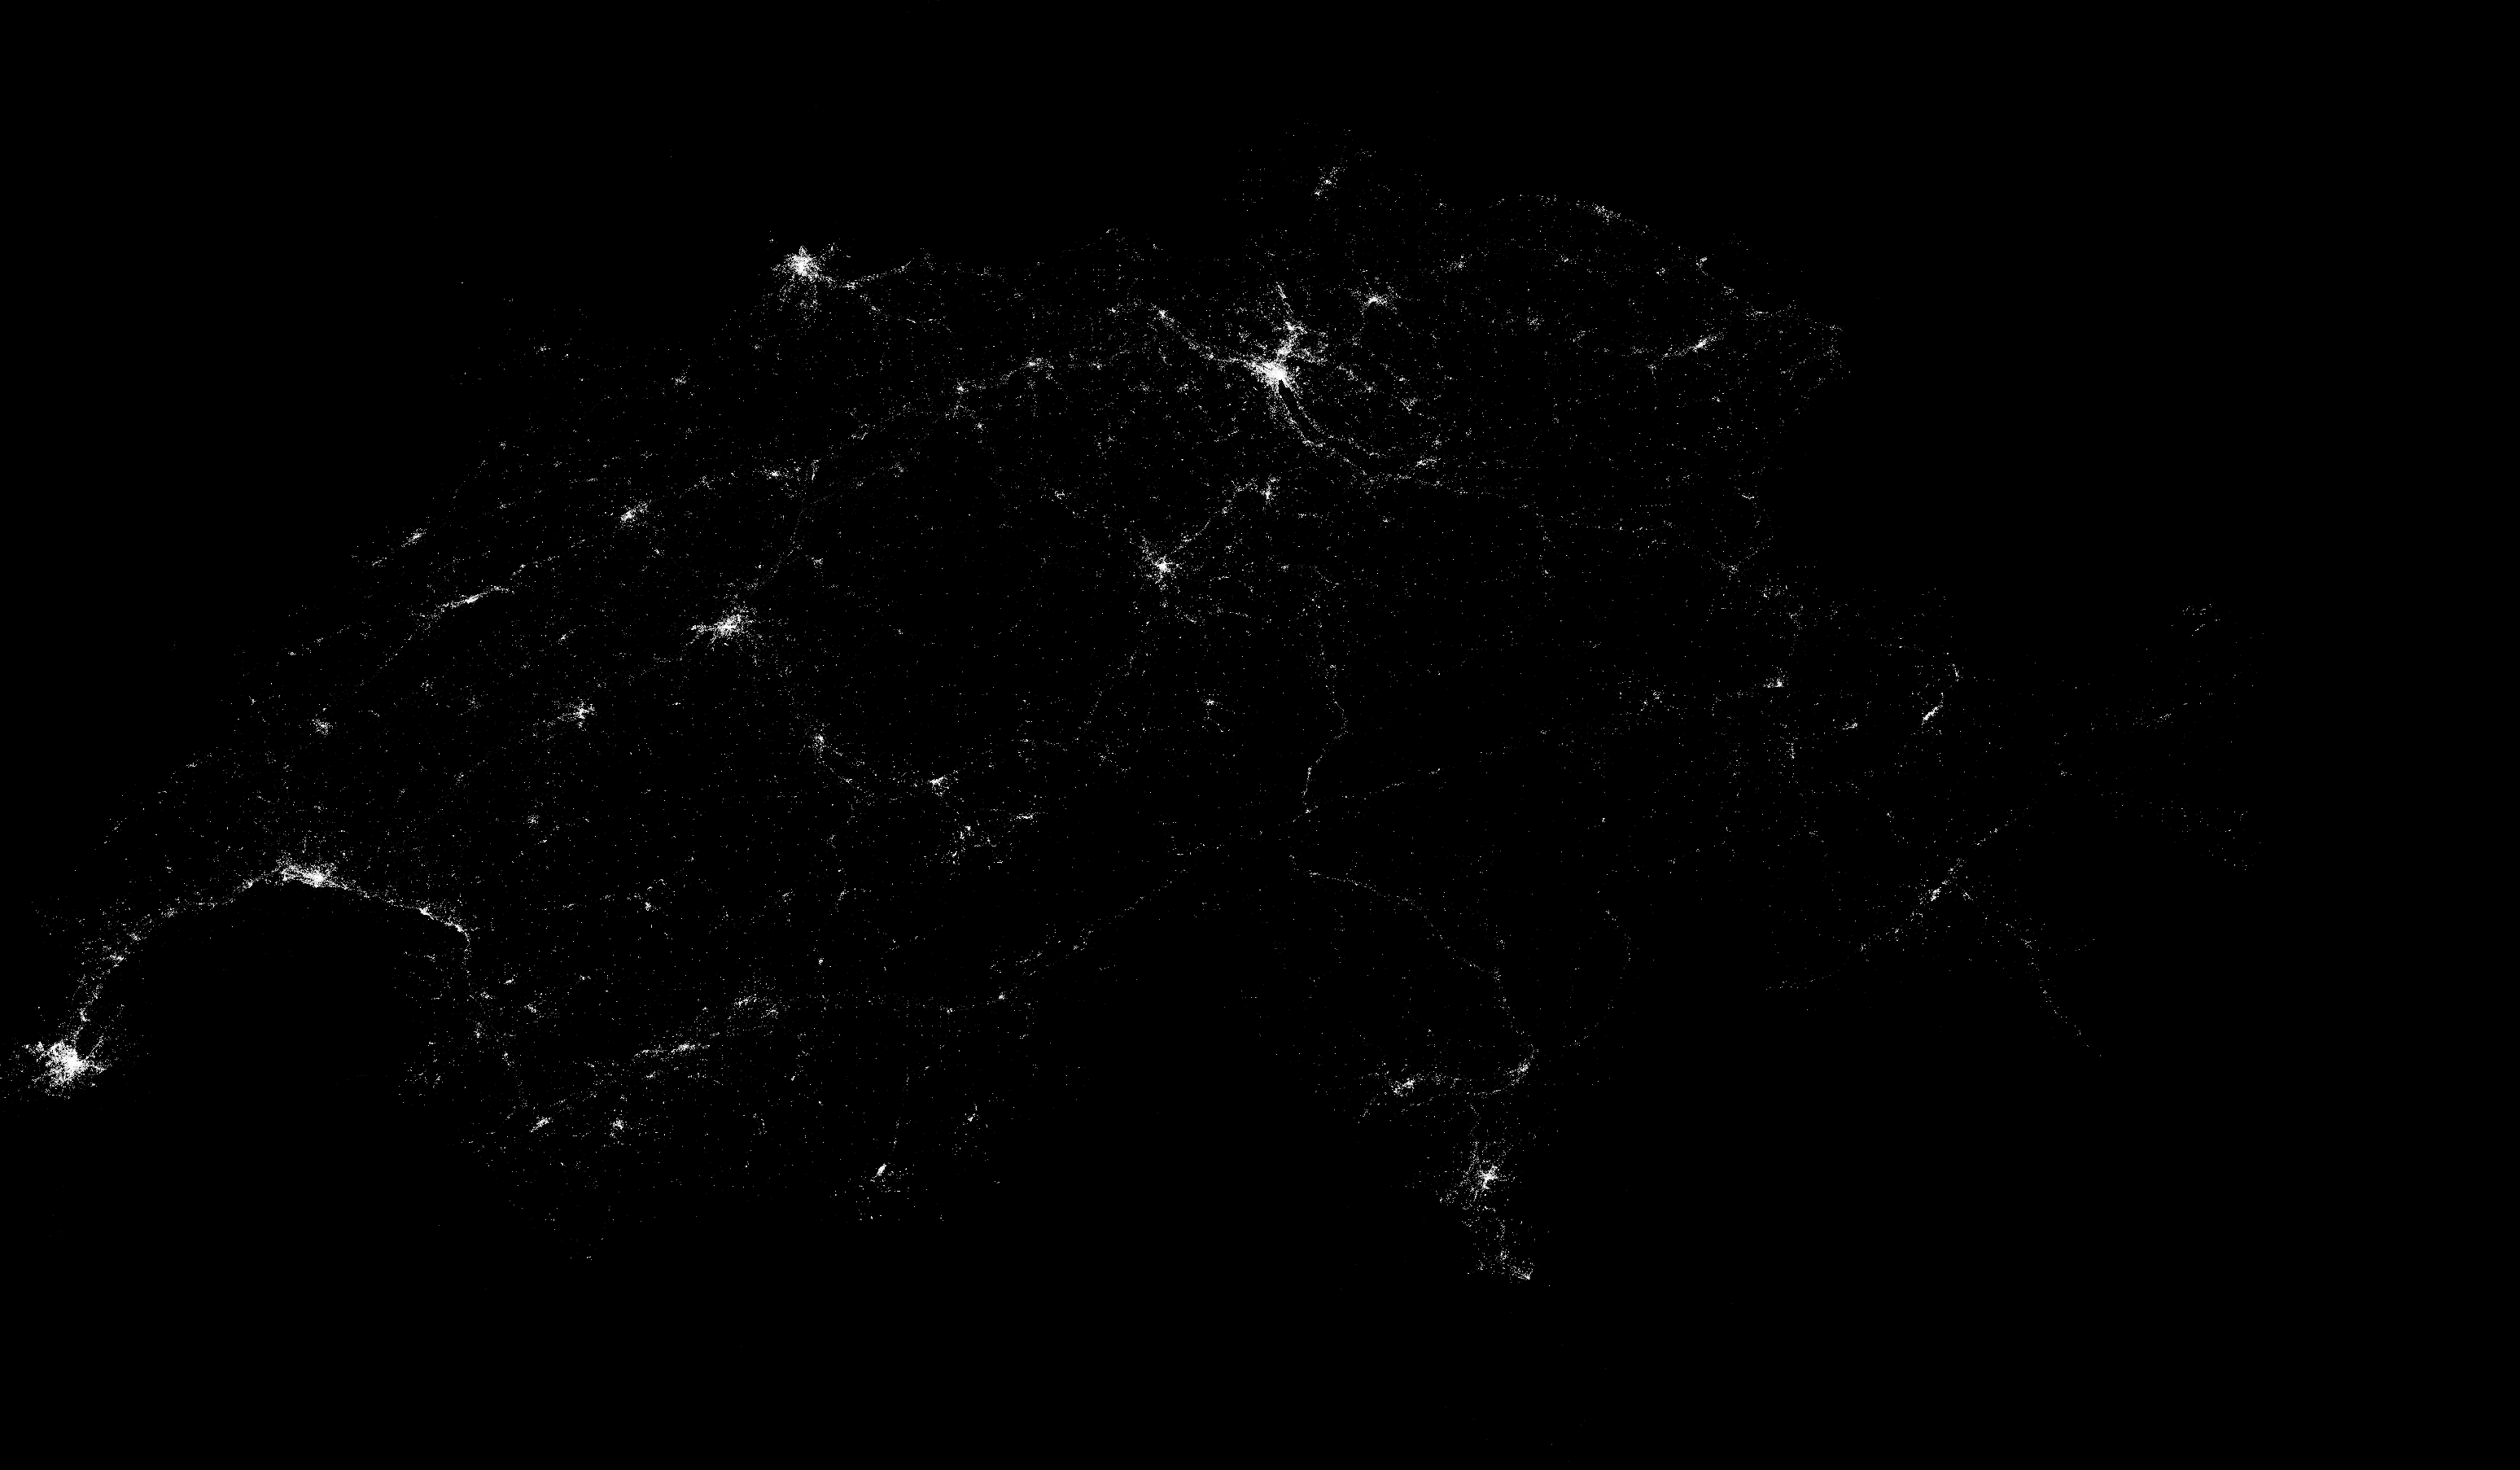

In [25]:
export(tf.shade(agg, cmap = cm(Greys9,0.2), how='eq_hist'),"census_gray_eq_hist")

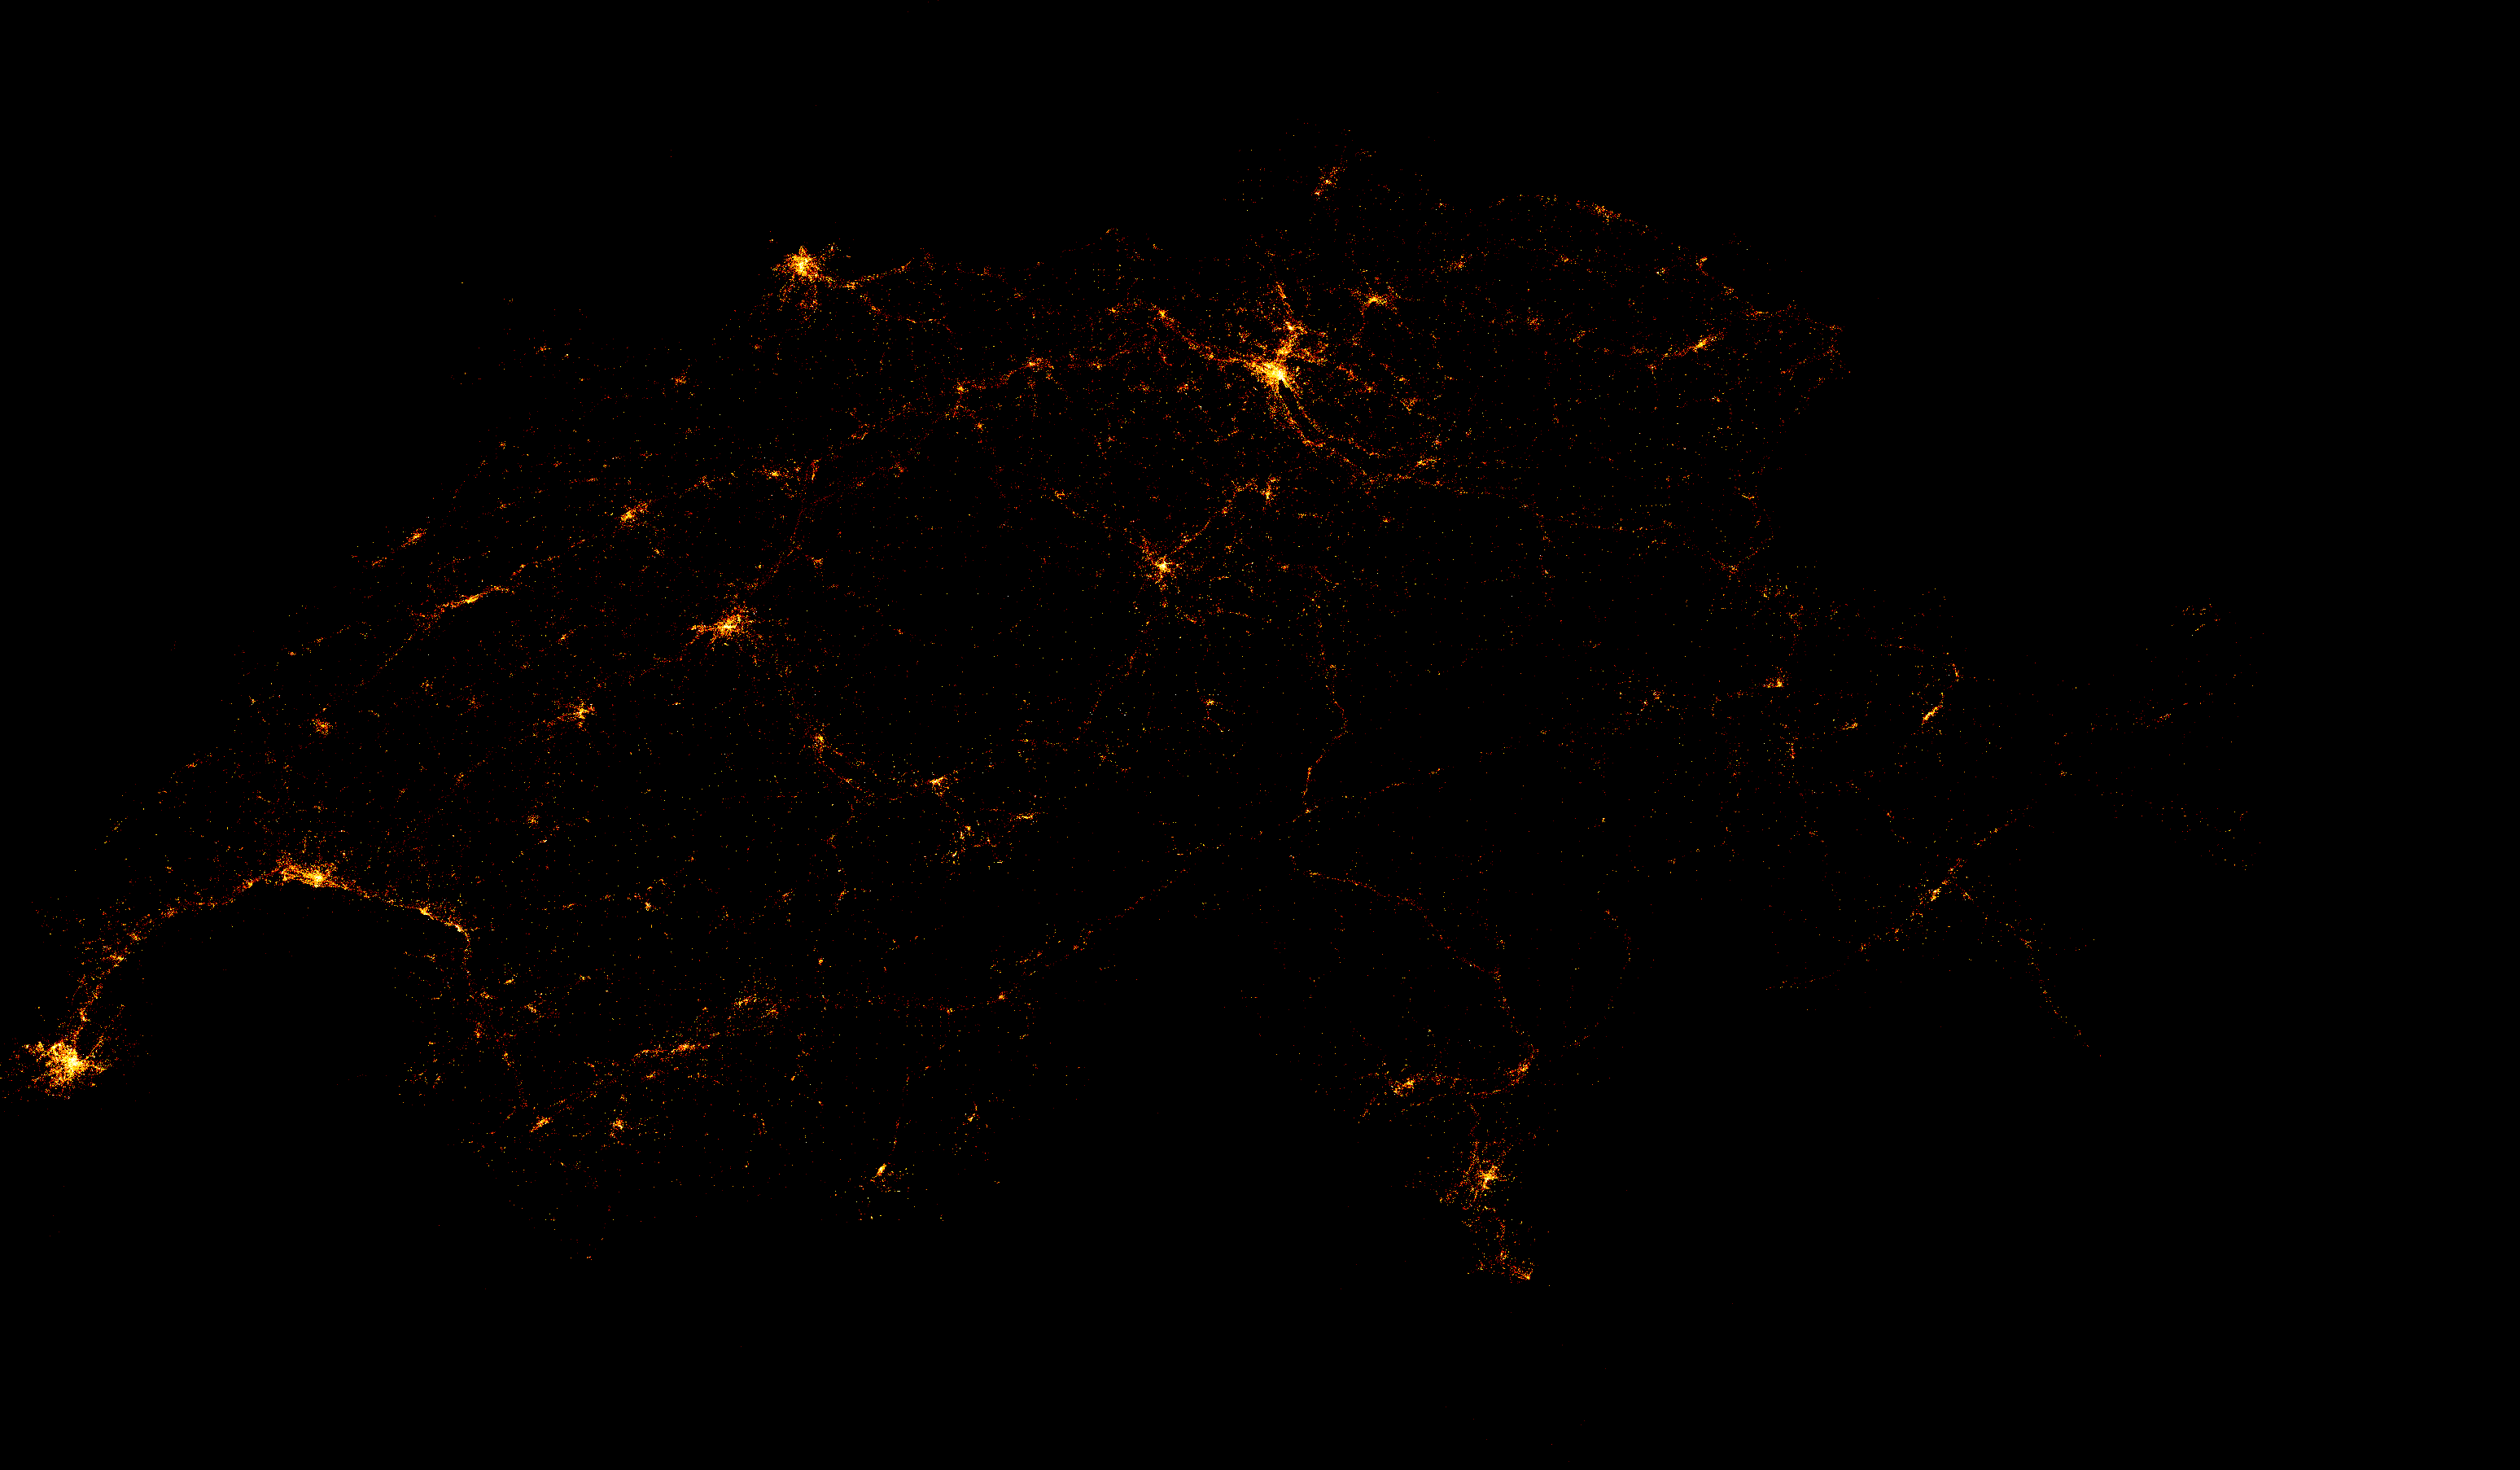

In [26]:
from colorcet import fire
export(tf.shade(agg, cmap = cm(fire,0.2), how='eq_hist'),"census_ds_fire_eq_hist")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
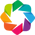

In [18]:
import holoviews as hv, geoviews as gv, geoviews.tile_sources as gts
from holoviews.operation.datashader import datashade, dynspread
from holoviews import opts
hv.extension('bokeh')

opts.defaults(
    opts.Overlay(width=900, height=525, xaxis=None, yaxis=None))

In [27]:
points = hv.Points(gv.Dataset(merc_coord_ds, kdims=['latitude', 'longitude']))

In [28]:
population = dynspread(datashade(points, cmap=fire, element_type=gv.Image))

In [30]:
population = dynspread(datashade(points, cmap=fire, element_type=gv.Image))
gts.EsriImagery() * population

:DynamicMap   []
   :Overlay
      .WMTS.I :WMTS   [Longitude,Latitude]
      .RGB.I  :RGB   [latitude,longitude]   (R,G,B,A)